In [1]:
from env import RiskEnvFlat
env = RiskEnvFlat({})
state = env.reset(seed=1)

In [2]:
from utils import get_key_for_name, get_name_for_key, print_territory_keys

print("I am", env.agent.name, "\n")

__, key = get_key_for_name("Alaska", env.territories)
print("The Alaska key is", key)

name = get_name_for_key(0, env.territories)
print("The territory for key 0 is", name, "\n")

#print_territory_keys(env.territories)

I am red 

The Alaska key is 0
The territory for key 0 is Alaska 



In [3]:
#Test the player/bot class and corresponding keys are correctly initialized
for player in env.players:
    print(player.name, player.key)
assert(len(env.players) == 6)

red 0
blue 1
green 2
yellow 3
purple 4
pink 5


In [4]:
#Test the continents class and corresponding territory bonus is correctly initialized 
continents = [i for i in env.continents]
for c in continents: print(c.name, "Bonus Reward:", c.bonus_troop_count)
#NA 5, Europe 5, Asia 7, SA 2, Africa 3, Austrlia 2 

print("")
for c in continents:
    print(c.name, ":", end=" ")
    for t in c.territories:
        print(t.name, end=", ")
    print("\n")

North America Bonus Reward: 5
Europe Bonus Reward: 5
Asia Bonus Reward: 7
South America Bonus Reward: 2
Africa Bonus Reward: 3
Australia Bonus Reward: 2

North America : Alaska, Northwest Territory, Greenland, Alberta, Ontario, Quebec, Western US, Eastern US, Central America, 

Europe : Iceland, Scandinavia, Ukraine, Great Britain, Northern Europe, Western Europe, Southern Europe, 

Asia : Ural, Siberia, Yakutsk, Kamchatka, Irkutsk, Mongolia, Japan, Afghanistan, China, Middle East, India, Siam, 

South America : Venezuela, Peru, Brazil, Argentina, 

Africa : North Africa, Egypt, East Africa, Congo, South Africa, Madagascar, 

Australia : Indonesia, New Guinea, West Australia, East Australia, 



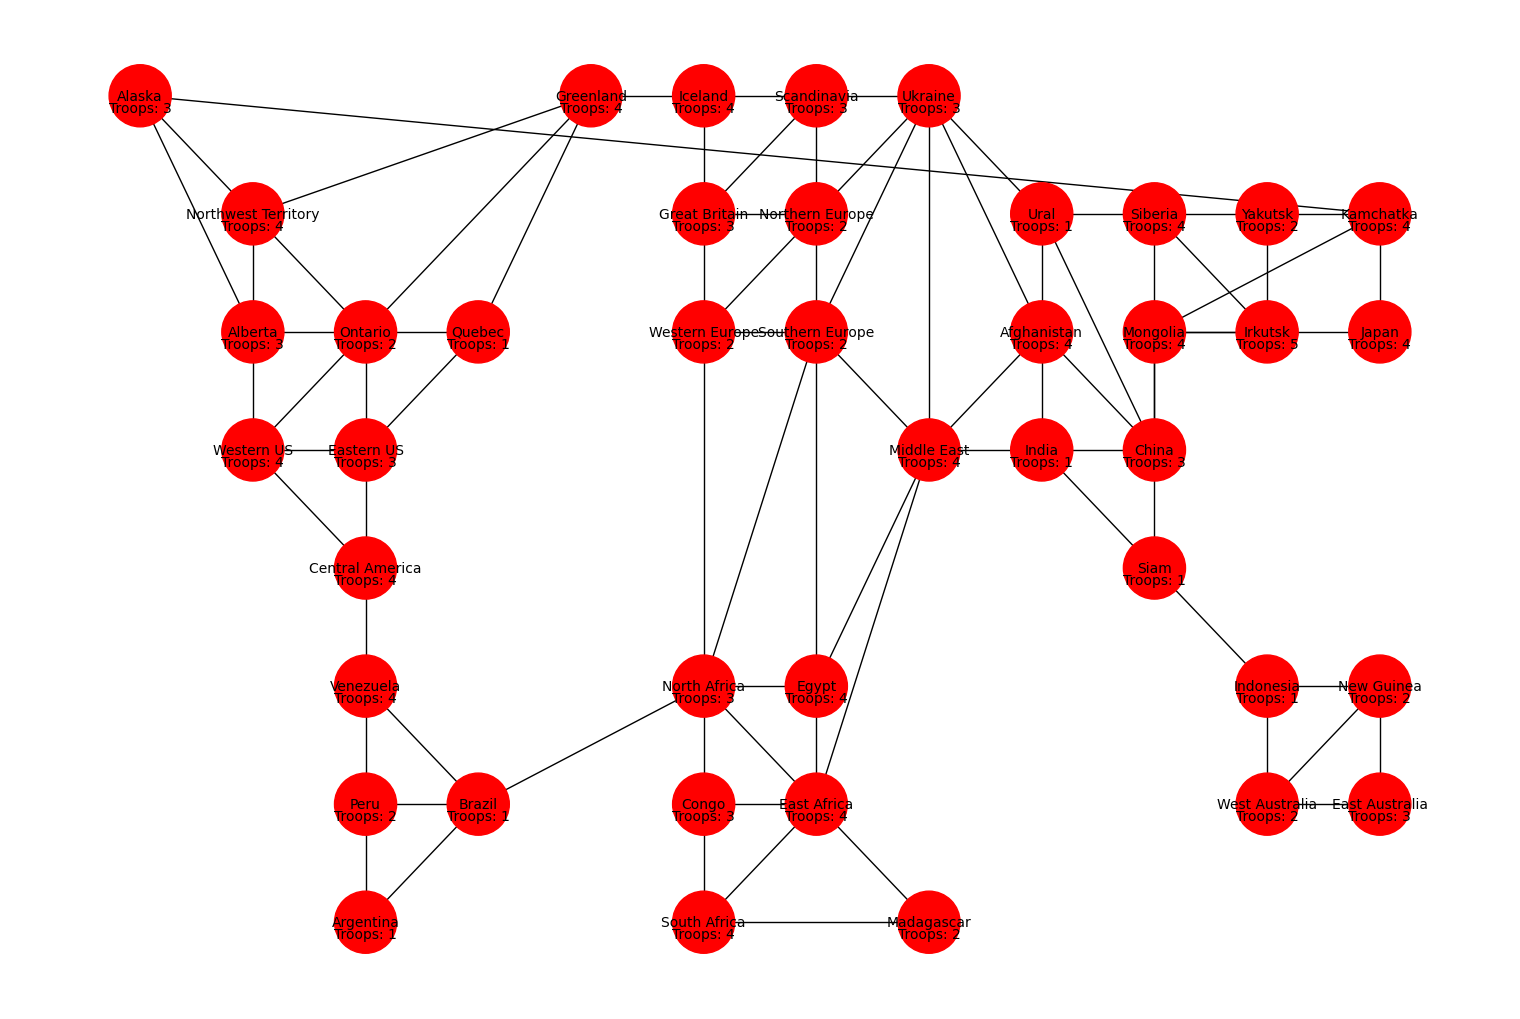

The agent owns 42 territories
Got placement troops: 38 ,Expected placement troops: 38


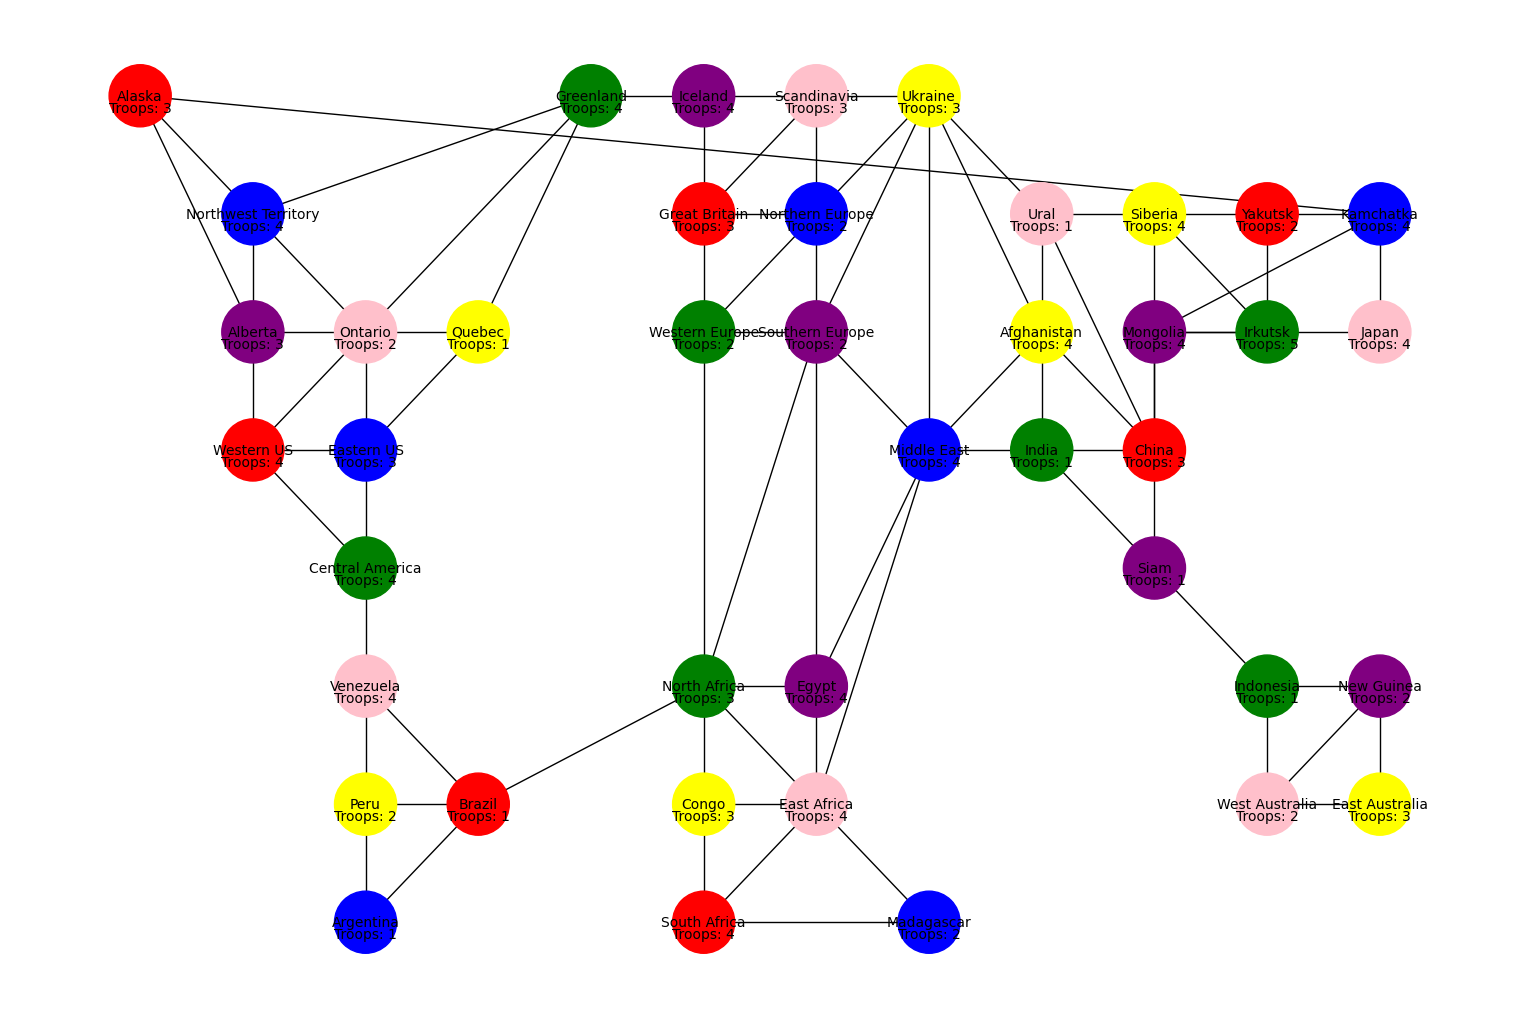

The agent owns 7 territories
Got placement troops: 3 ,Expected placement troops: 3


In [5]:
#test players get the correct troop placement amount
from atomic_actions import get_troops
state = env.reset(seed=1)
for t in env.territories:
    if t.owner.name != env.agent.name:
        t.owner = env.agent.name
        t.owner_color = env.agent.name
        env.agent.territories[t.key] = 1
        env.agent.territory_count += 1
env.get_state()
env.show_board()


env.agent.placeable_troops = 0
get_troops(env.agent, env.territories)
actual = env.agent.placeable_troops

# 42 territories, so 42 // 3 is 14 
# then, 5 + 5 + 7 + 2 + 3 + 2
expected = (42 // 3) + (5 + 5 + 7 + 2 + 3 + 2)
print("The agent owns", env.agent.territory_count, "territories")
print("Got placement troops:", actual, ",Expected placement troops:", expected)
assert(actual == expected)
state = env.reset(seed=1)


env.get_state()
env.show_board()
        
env.agent.placeable_troops = 0
get_troops(env.agent, env.territories)
actual = env.agent.placeable_troops

expected = 3
print("The agent owns", env.agent.territory_count, "territories")
print("Got placement troops:", actual, ",Expected placement troops:", expected)
assert(actual == expected)

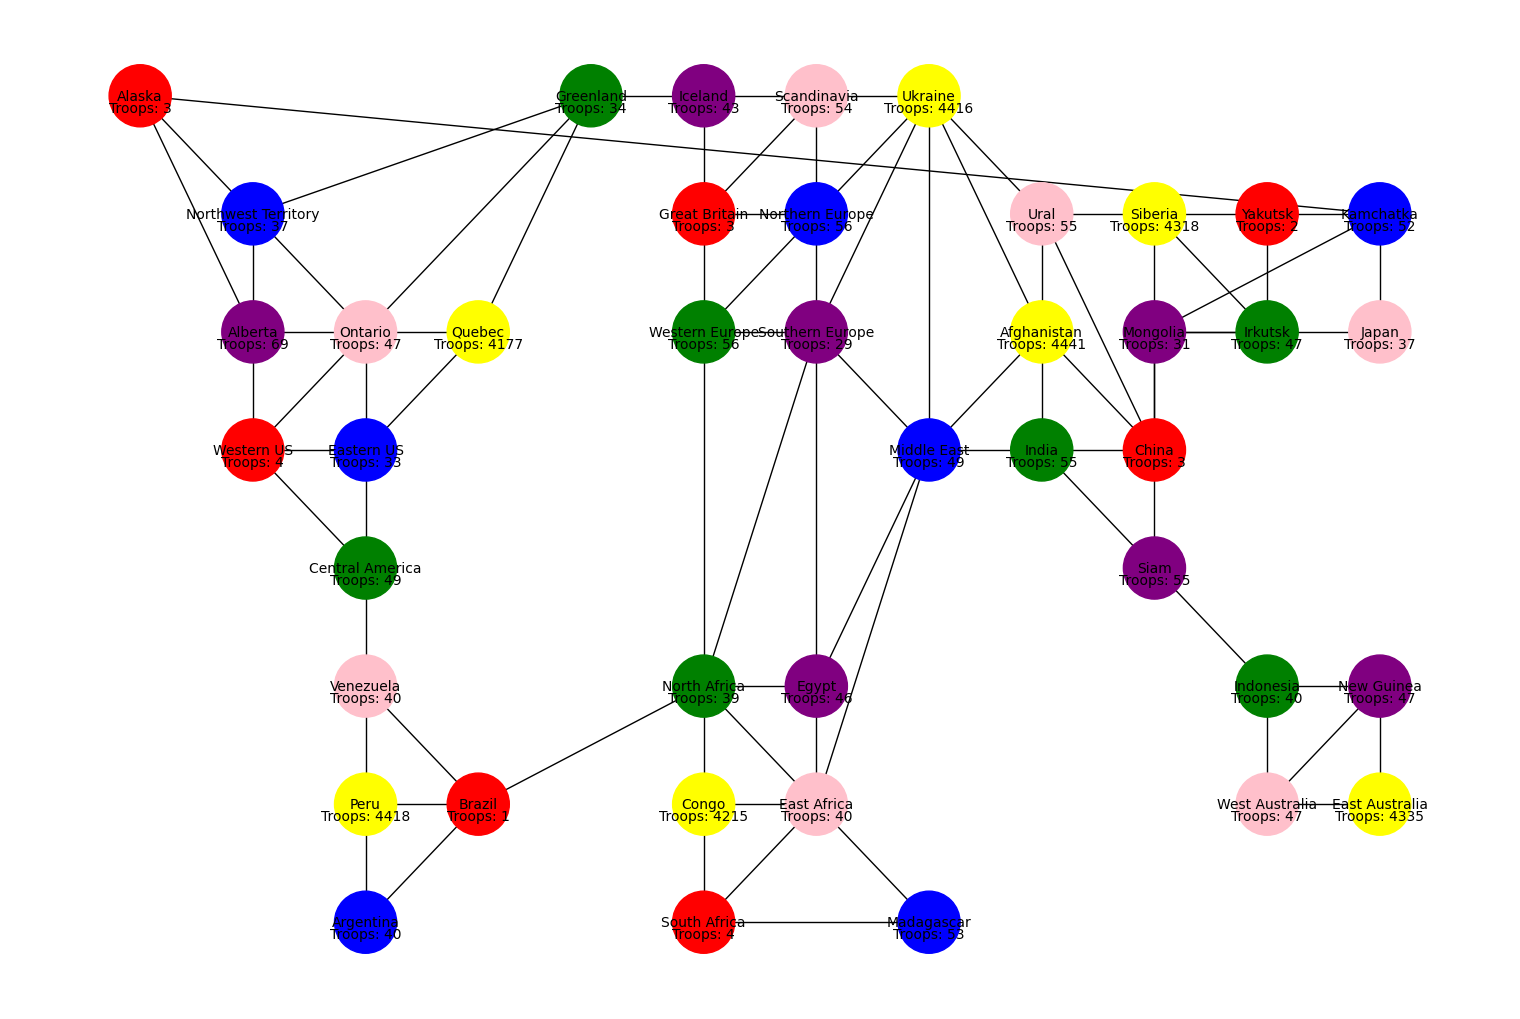

In [6]:
#test neutral bots 
from actors import Neutral_Bot
bot_types =   ["Neutral", "Neutral", "Neutral", "Neutral", "Neutral"]

env = RiskEnvFlat(bot_types,{})
state = env.reset(seed=1)

#every bot takes turns making their move (which is placing troops randomly)
#everyone should have a lot of troops roughly evenly distributed except the red Agent 
for turn in range(100):
    for actor in env.players:
        if actor.is_bot:
            assert(actor.make_move(env.players, env.territories) == True)

#give the 2nd bot many extra turns because why not, we expect that bot to get many extra troops 
actor = env.players[3]
for turn in range(10000):
        if actor.is_bot:
            assert(actor.make_move(env.players, env.territories) == True)   
env.show_board()

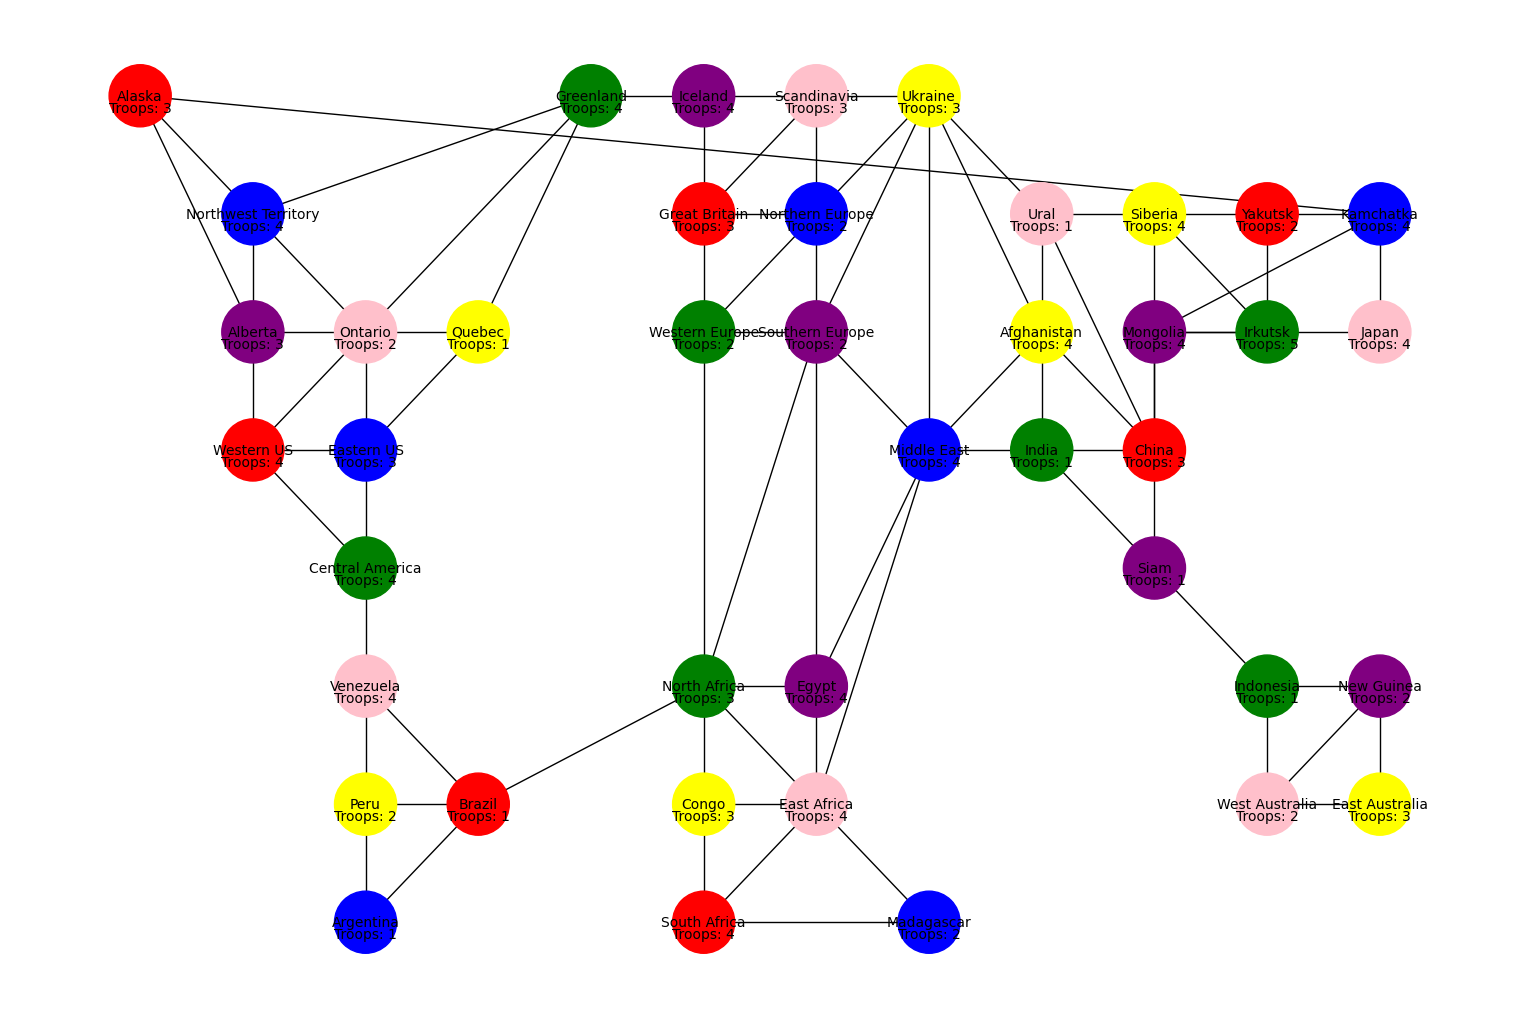

red: 3 20
blue: 0 23
green: 0 23
yellow: 0 23
purple: 0 23
pink: 0 23


In [7]:
#Test the attributes inside of the bot/player are correctly updated 
env = RiskEnvFlat({})
state = env.reset(seed=1)
env.show_board()

for turn in range(1):
    for actor in env.players:
        if actor.is_bot:
            assert(actor.make_move(env.players, env.territories) == True)

for actor in env.players:
    print(actor.name + ":", actor.placeable_troops, actor.total_troops)

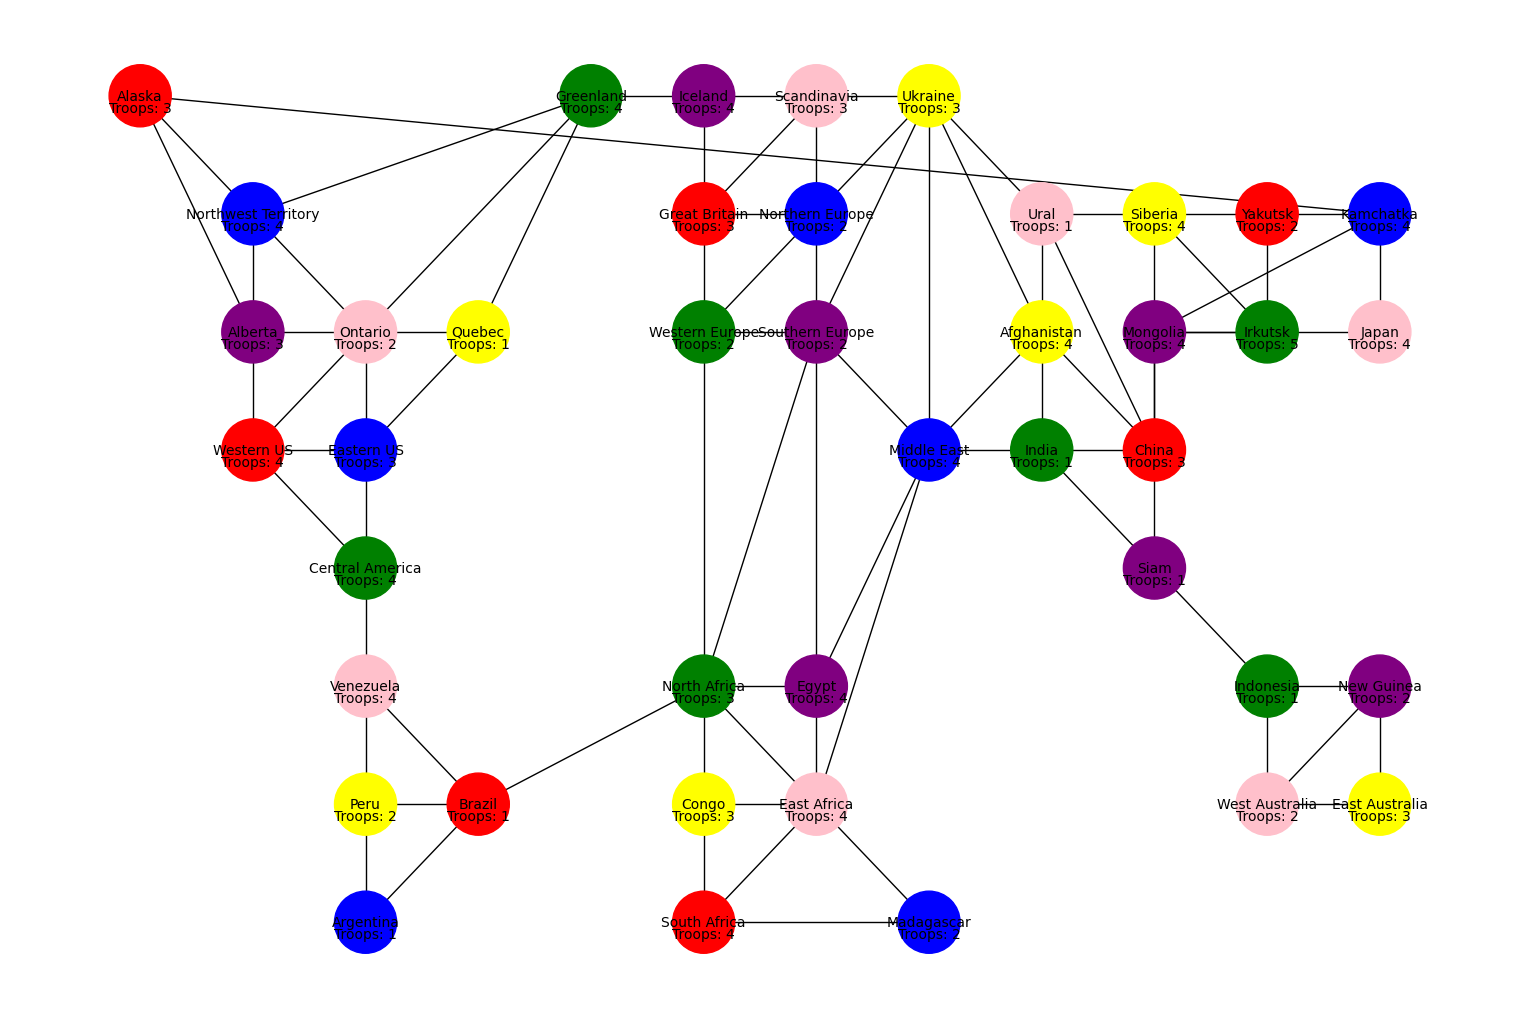

blue is placing 3 in Middle East
blue attacked India and won
blue attacked Siam and won
green is placing 3 in Western Europe
green attacked Northern Europe and won
green decided not to attack Southern Europe because of low troops
yellow is placing 3 in Quebec
yellow attacked Ontario and won
yellow decided not to attack Alberta because of low troops
purple is placing 3 in Egypt
purple attacked Middle East and won
pink is placing 3 in East Africa
pink attacked Egypt and won
blue is placing 3 in Kamchatka
green is placing 3 in Western Europe
yellow is placing 3 in Congo
purple is placing 3 in Iceland
purple attacked Scandinavia and won
pink is placing 3 in East Africa
blue is placing 3 in Northwest Territory
blue attacked Alaska and won
blue attacked Alberta and won
blue decided not to attack Ontario because of low troops
green is placing 3 in Irkutsk
green attacked Yakutsk and won
yellow is placing 3 in Peru
yellow attacked Brazil and won
yellow attacked Argentina and won
purple is placi

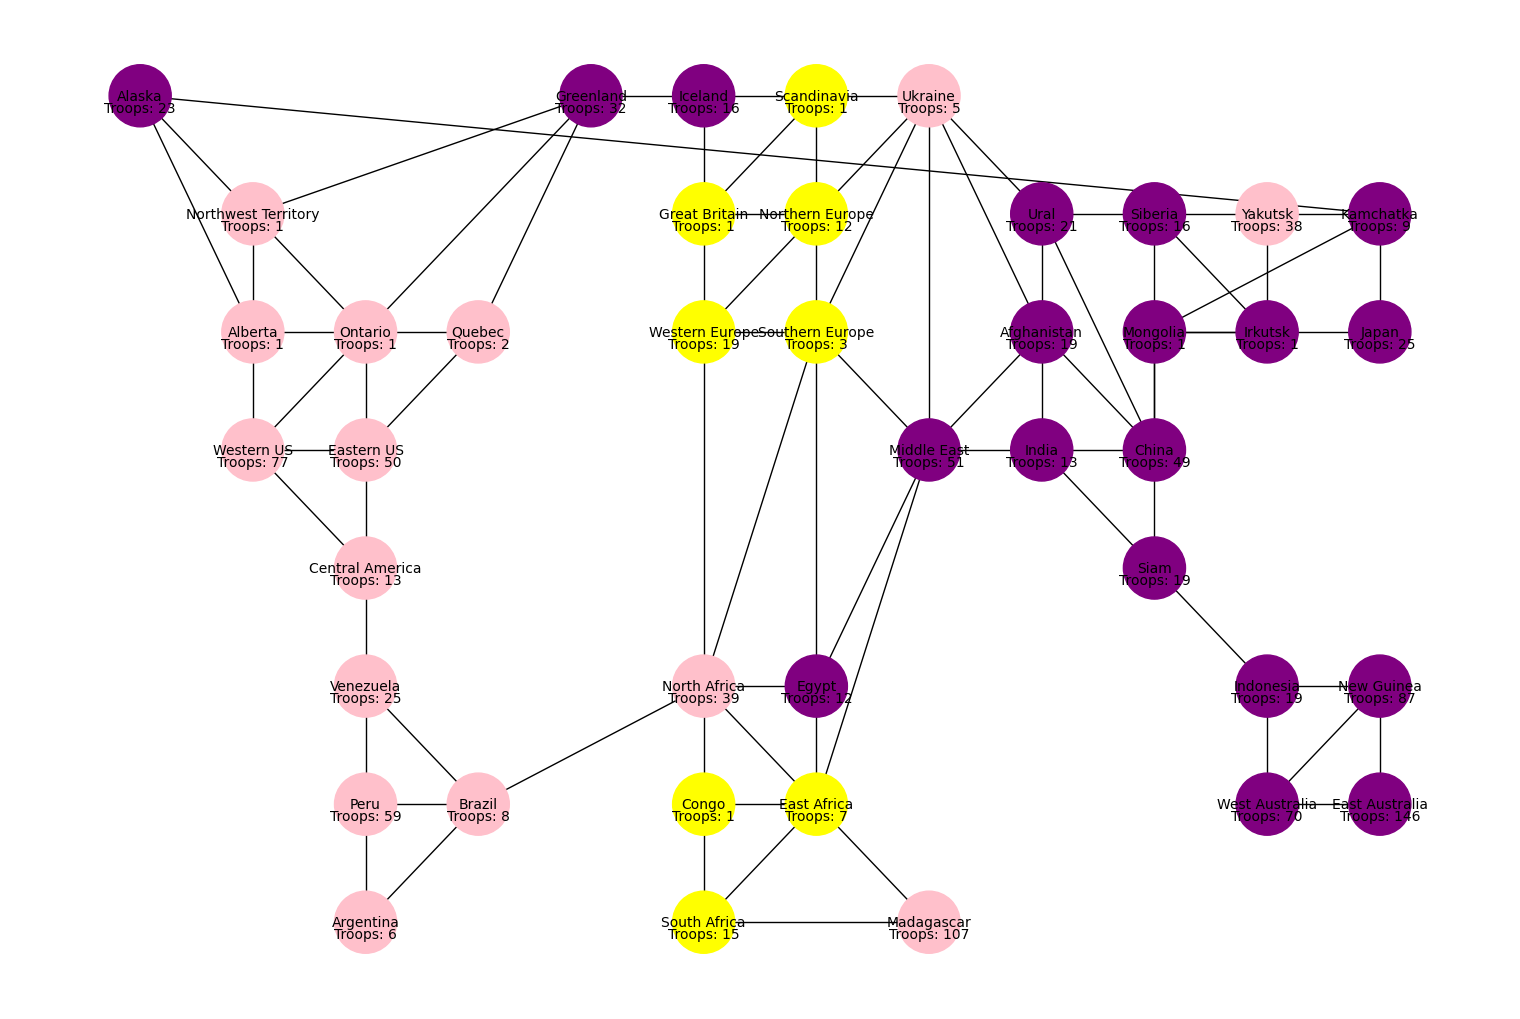

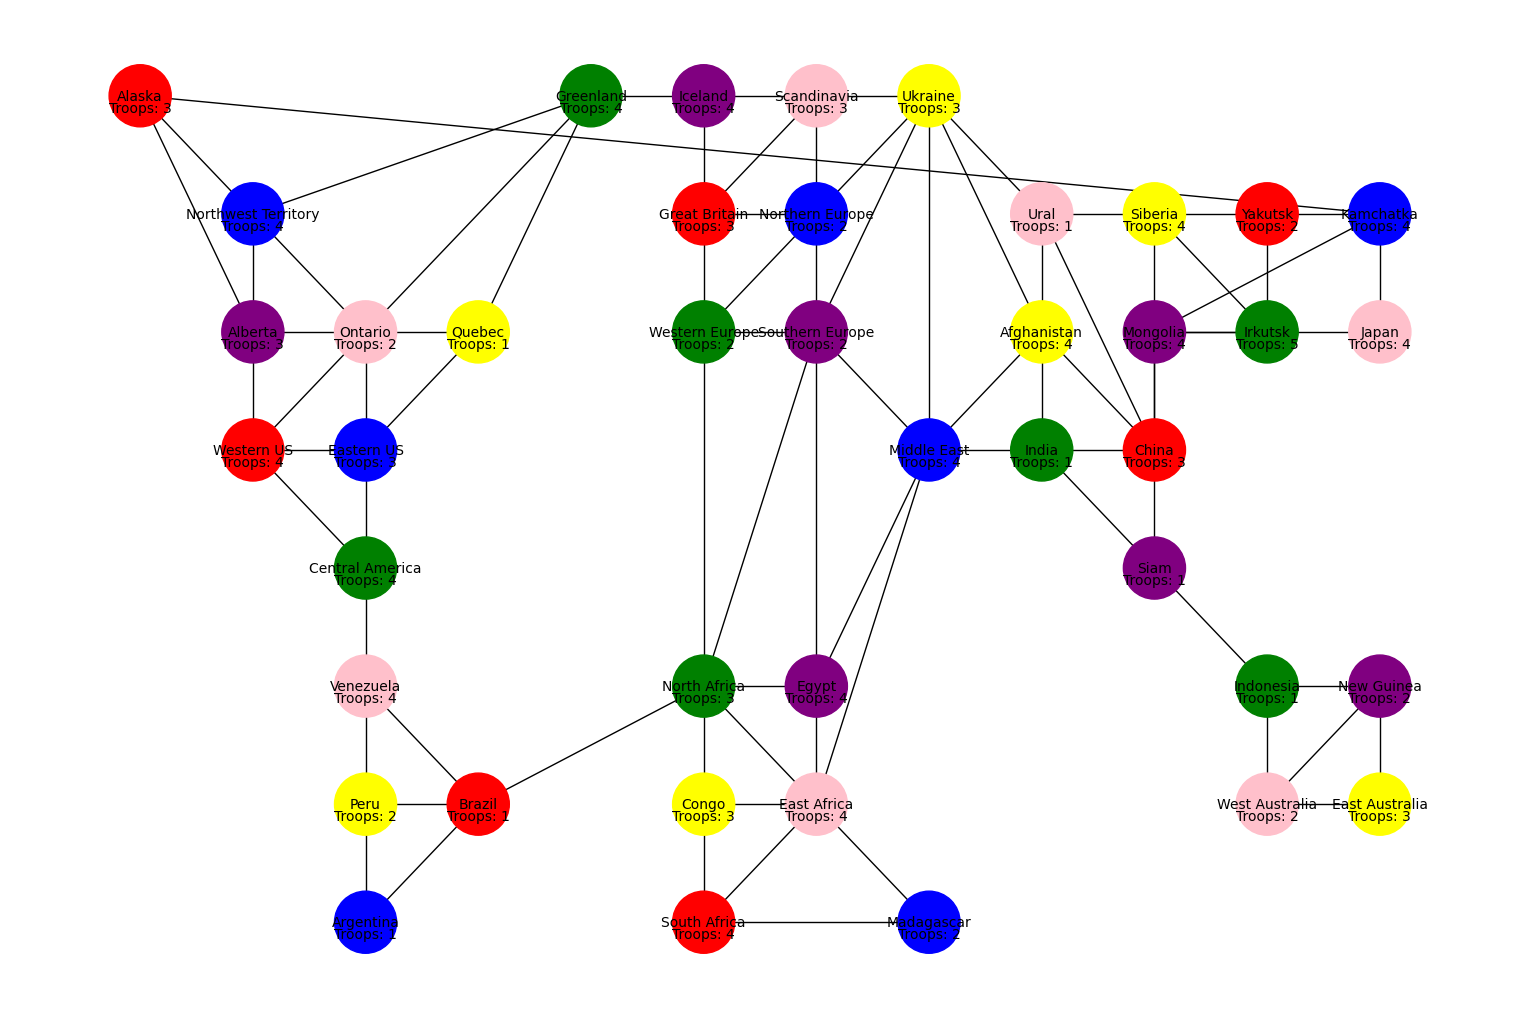

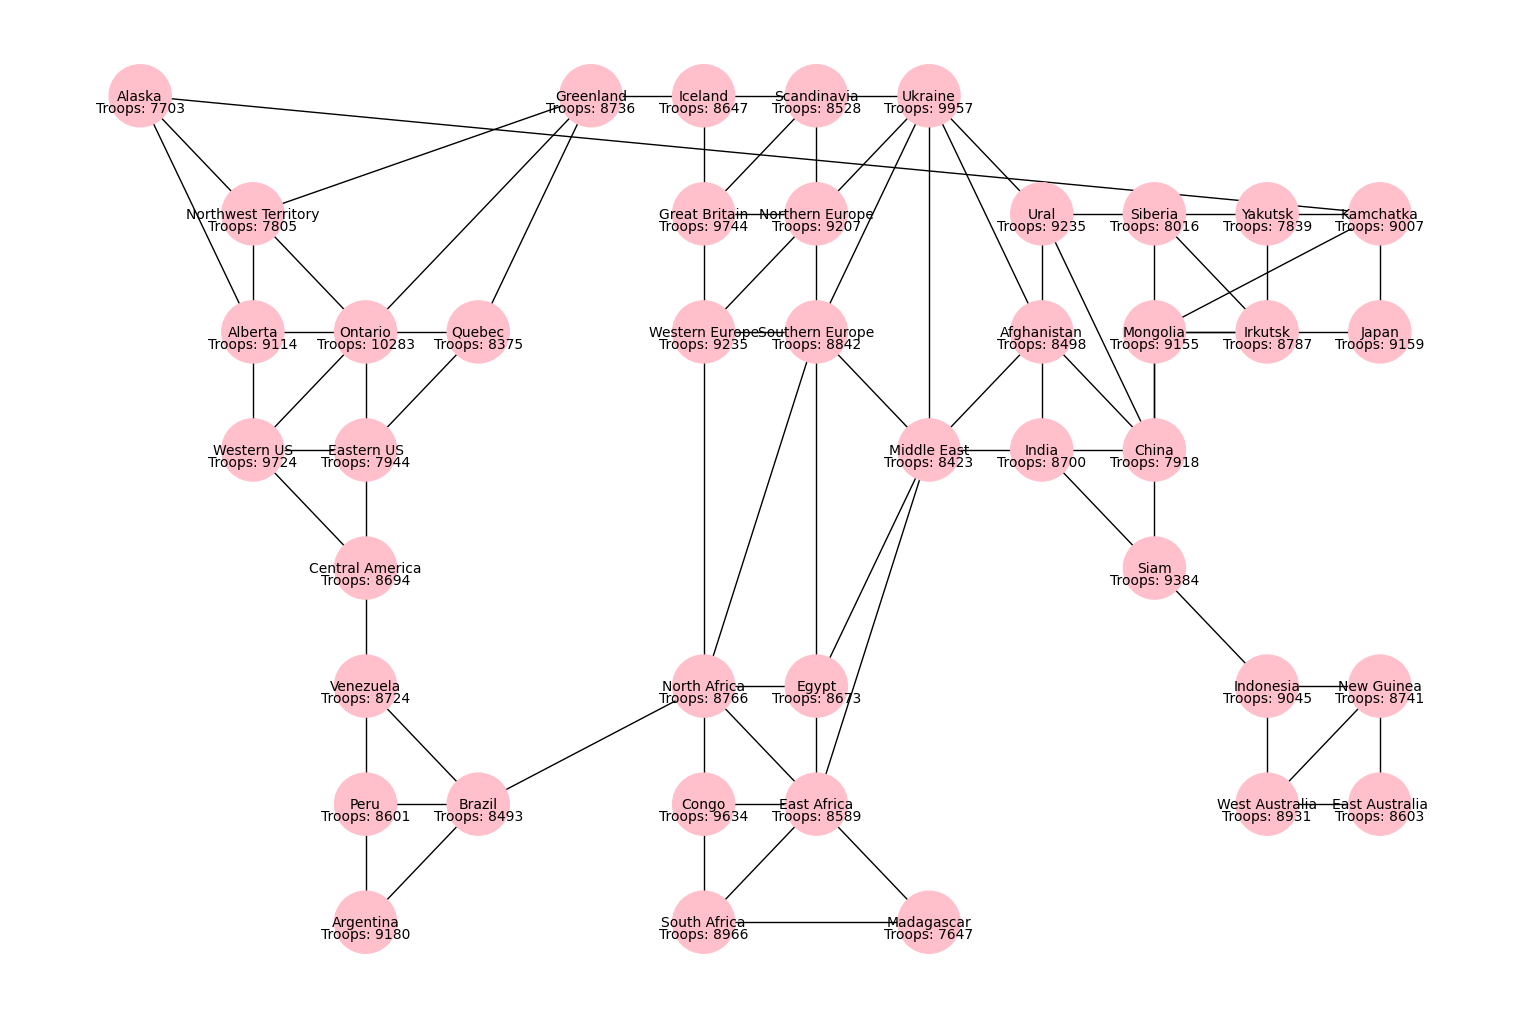

In [8]:
#test random bots 
from actors import Random_Bot
bot_types =   ["Random", "Random", "Random", "Random", "Random"]

env = RiskEnvFlat(bot_types,{})
state = env.reset(seed=1)
env.show_board()
for turn in range(300):
    for actor in env.players:
        if actor.is_bot:
            assert(actor.make_move(env.players, env.territories, verbose=True) == True)
env.show_board()          

env = RiskEnvFlat(bot_types,{})
state = env.reset(seed=1)
env.show_board()
for turn in range(10000):
    for actor in env.players:
        if actor.is_bot:
            assert(actor.make_move(env.players, env.territories, verbose=False) == True)
env.show_board()

blue Trying to take North America with up to 3 attacks
blue Decided to attack Alaska using 3 troops
blue Decided to fortify due to not having a good target, coming from Alaska
blue Fortifying to Northwest Territory
green No real goals, just making some mostly random attacks on any available neighbor near biggest stack
green Decided to attack Siberia using 4 troops
green Decided to fortify due to not having a good target, coming from Siberia
green wanted  to fortify, but could not
yellow No real goals, just making some mostly random attacks on any available neighbor near biggest stack
yellow Decided to attack Ural using 3 troops
yellow Decided to fortify due to not having a good target, coming from Ural
yellow Fortifying to Ukraine
purple Trying to take Europe with up to 3 attacks
purple Decided to attack Scandinavia using 3 troops
purple Decided to fortify due to not having a good target, coming from Scandinavia
purple wanted  to fortify, but could not
pink No real goals, just making s

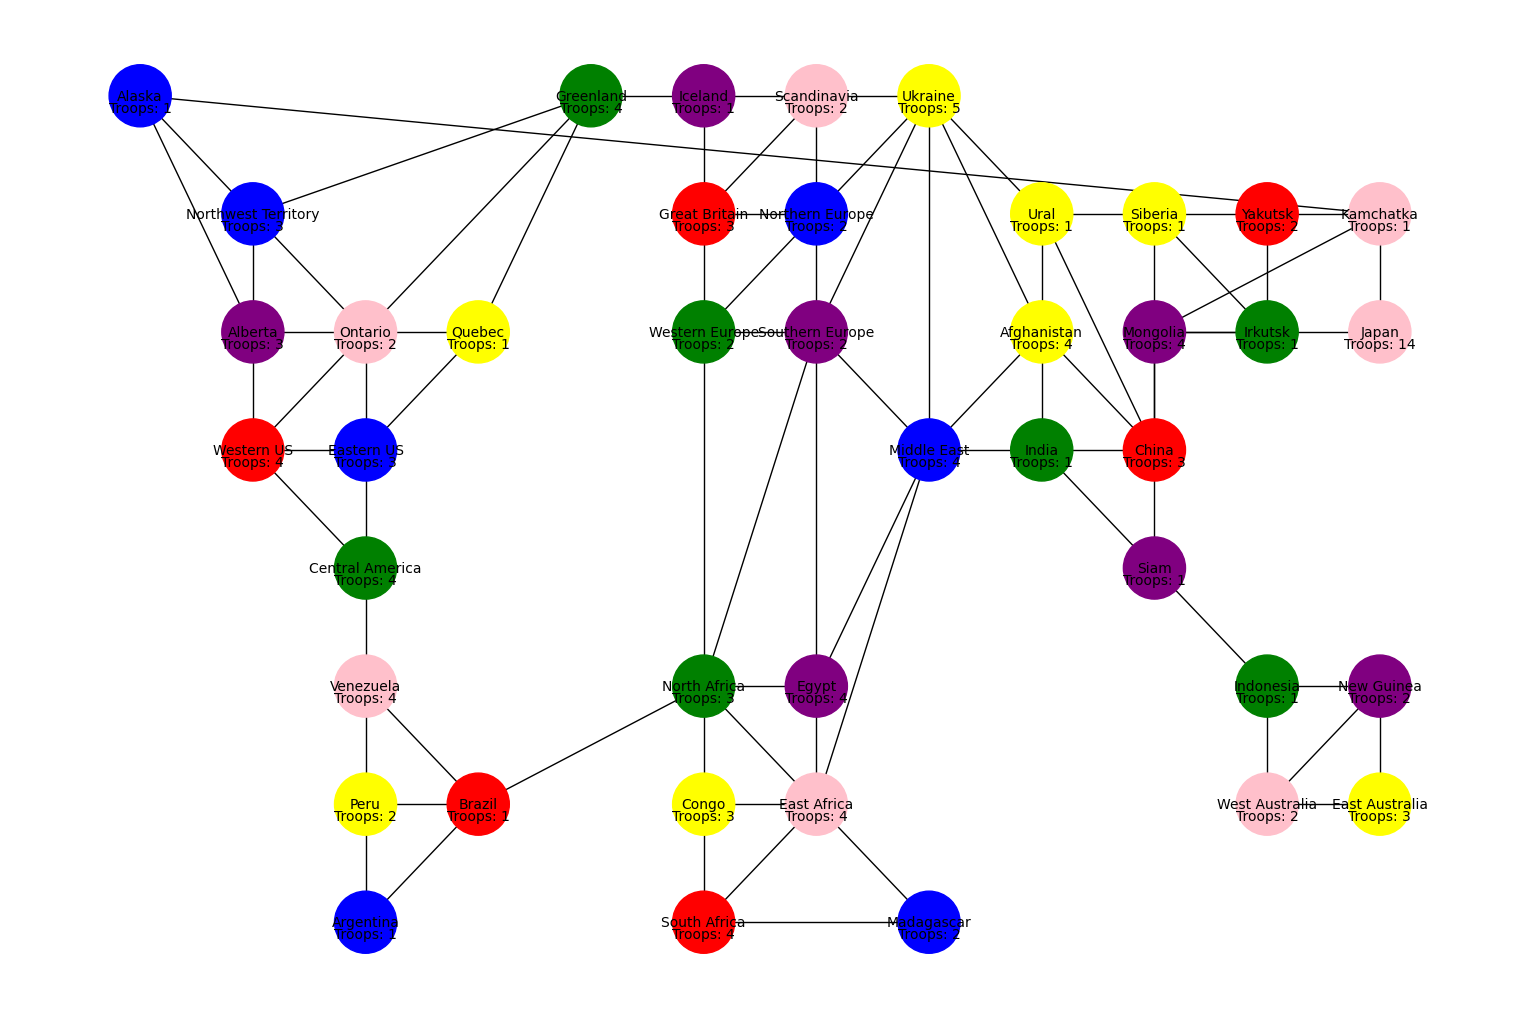

In [9]:
#test TFT bots 
from actors import TFT_Bot
bot_types =   ["TFT", "TFT", "TFT", "TFT", "TFT"]

env = RiskEnvFlat(bot_types,{})
state = env.reset(seed=1)

#test each bot can make 1 move of any kind at all 
for turn in range(1):
    for actor in env.players:
        if actor.is_bot:
            assert(actor.make_move(env.players, env.territories, verbose=True) == True)
env.show_board()